In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
weather_data=pd.read_csv("myweather.csv")

weather_data

,humidity,tempreature,pressure,rain,winter,summer,spring
0,27,0.74,1010,0,1,0,0
1,32,0.85,9999,0,1,0,0
2,44,0.84,9999,0,1,0,0
3,41,0.76,1010,0,1,0,0
4,47,1.30,1011,0,1,0,0
...,...,...,...,...,...,...,...
194,40,50.00,1014,0,0,1,0
195,34,60.00,1014,0,0,1,0
196,28,51.00,1014,0,0,1,0
197,21,53.00,1014,0,0,1,0


In [25]:
weather_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   humidity     199 non-null    int64  
 1   tempreature  199 non-null    float64
 2   pressure     199 non-null    int64  
 3   rain         199 non-null    int64  
 4   winter       199 non-null    int64  
 5   summer       199 non-null    int64  
 6   spring       199 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 11.0 KB


In [26]:
#weather_data.describe()

In [27]:
#for historic graph
#%matplotlib inline
#import matplotlib.pyplot as plt
#weather_data.hist(bins=50, figsize=(20,15))

In [28]:
## Train test spliting
import numpy as np
def split_train_test(data,test_ratio):
    #np.random.seed(42)

    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [29]:
train_set, test_set=split_train_test(weather_data,0.2)

[184  19 178 105  91  59 142  55  61 137 193 120 162  96 159 106  44 167
  17 150 192   8  58 156 102  82 155 121 101  92 166  53  63 108 154 135
  37  84 112 185  14  71  39  32  20  22 116  23 138  62   2  85 174 110
  27 188 177 170  50  33  11  68 153  90  31 123 191   9  29 128 113  36
 160 100 189 148 175  35  65 181 122  49  69 183  94  16 173 194 195 165
  75  24 176 151  77  30 109 114 198  89  76   4  40  72  83  95 147 190
 129   5 132 136 186 168 182  88   0 103  51  18 163 172  46  56 119   7
  41  73  86 125 107  42   3  99  52  26 117 171 145 158 133   6 111  48
  66  80  13  64 149  21  98  25 180 157 131  57  43  74 187  45  15 124
 126  87  67 144 161 104  60  54 143 118  78 134 196 169 139 179  93  10
   1 140 141  34  81  12  70  97  47 115  79 197 164 130  38 146 152  28
 127]


In [30]:
#print(f"rows in train set :{len(train_set)}\n Rows in test set:{len(test_set)}\n")

In [31]:
from sklearn.model_selection import train_test_split
train_set, test_set= train_test_split(weather_data, test_size=0.2, random_state=42)
print(f"rows in train set :{len(train_set)}\n Rows in test set:{len(test_set)}\n")

rows in train set :159
 Rows in test set:40



In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(weather_data, weather_data['winter ']):
    strat_train_set= weather_data.loc[train_index]
    strat_test_set= weather_data.loc[test_index]




In [33]:
strat_test_set

,humidity,tempreature,pressure,rain,winter,summer,spring
91,56,30.00,1013,1,0,0,1
61,77,21.00,1012,0,1,0,0
156,30,16.00,1012,0,1,0,0
157,32,15.00,1013,0,1,0,0
75,59,28.00,1011,1,0,0,1
4,47,1.30,1011,0,1,0,0
81,23,23.00,1011,1,0,0,1
138,49,27.00,1015,1,1,0,1
108,25,15.00,1012,0,1,0,0
185,49,47.00,1012,0,0,1,0


In [34]:
strat_test_set['summer'].value_counts()

0    32
1     8
Name: summer, dtype: int64

In [35]:
#21/17

In [36]:
strat_train_set['summer'].value_counts()

0    134
1     25
Name: summer, dtype: int64

In [37]:
#87/70

In [38]:
### lookimg for corelation
corr_matrix = weather_data.corr()
corr_matrix['summer'].sort_values(ascending=False)

summer         1.000000
tempreature    0.816917
spring         0.015835
pressure       0.014835
humidity      -0.093017
rain          -0.335712
winter        -0.461834
Name: summer, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210922F1A88>,
      dtype=object)

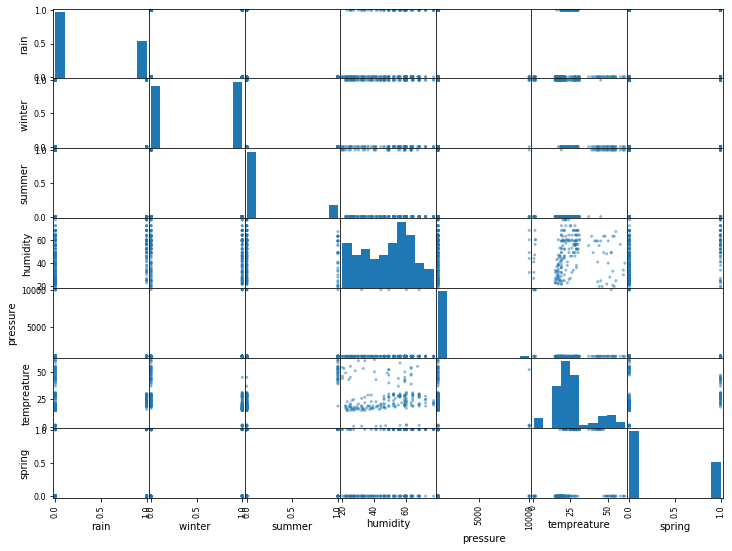

In [39]:
from pandas.plotting import scatter_matrix
attributes =["rain","winter ","summer","humidity","pressure","tempreature","spring"]
scatter_matrix(weather_data[attributes],figsize = (12,9))

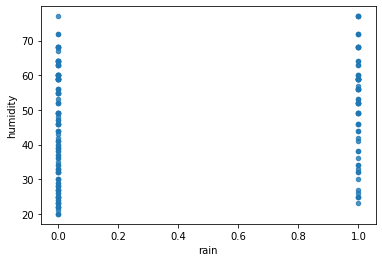

In [40]:
#we can take any combination to get full figure of the above
weather_data.plot(kind="scatter",x="rain",y="humidity",alpha=0.8)


In [41]:
### lookimg for corelation
corr_matrix = weather_data.corr()
corr_matrix['winter '].sort_values(ascending=False)

winter         1.000000
pressure       0.090806
humidity      -0.122840
spring        -0.268640
rain          -0.403209
summer        -0.461834
tempreature   -0.549992
Name: winter , dtype: float64

In [42]:
##missing valueslab
a = weather_data.dropna(subset=["rain"])
a.shape

(199, 7)

In [43]:
weather_data=strat_train_set.drop("winter ", axis=1)
weather_data_label=strat_train_set["winter "].copy()


In [44]:
weather_data.drop("pressure",axis=1)#remove date nd time



,humidity,tempreature,rain,summer,spring
117,49,30.00,1,0,1
136,46,21.00,0,0,0
165,55,37.00,0,0,1
0,27,0.74,0,0,0
101,59,19.00,0,0,0
...,...,...,...,...,...
196,28,51.00,0,1,0
25,41,23.00,1,0,0
85,27,18.00,0,0,0
142,59,28.00,1,0,1


In [45]:
median=weather_data["pressure"].median()

In [46]:
weather_data["pressure"].fillna(median)

117    1014
136    1015
165    1013
0      1010
101    1014
       ... 
196    1014
25     1009
85     1011
142    1015
72     1011
Name: pressure, Length: 159, dtype: int64

In [47]:
weather_data.shape

(159, 6)

In [48]:
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(strategy="median")
Imputer.fit(weather_data)


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [49]:
 Imputer.statistics_

array([  49.,   22., 1012.,    0.,    0.,    0.])

In [50]:
X=Imputer.transform(weather_data)

In [51]:
weather_data_tr = pd.DataFrame( X, columns=weather_data.columns)

In [52]:
weather_data_tr

,humidity,tempreature,pressure,rain,summer,spring
0,49.0,30.00,1014.0,1.0,0.0,1.0
1,46.0,21.00,1015.0,0.0,0.0,0.0
2,55.0,37.00,1013.0,0.0,0.0,1.0
3,27.0,0.74,1010.0,0.0,0.0,0.0
4,59.0,19.00,1014.0,0.0,0.0,0.0
...,...,...,...,...,...,...
154,28.0,51.00,1014.0,0.0,1.0,0.0
155,41.0,23.00,1009.0,1.0,0.0,0.0
156,27.0,18.00,1011.0,0.0,0.0,0.0
157,59.0,28.00,1015.0,1.0,0.0,1.0


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('Imputer',SimpleImputer(strategy= "median")),
     ('std_scaler', StandardScaler()),
     ])

In [54]:
weather_data_num_tr=my_pipeline.fit_transform(weather_data_tr)

In [55]:
weather_data_num_tr

array([[ 0.09979714,  0.34483667, -0.13720695,  1.28452326, -0.43193421,
         1.35620268],
       [-0.09215139, -0.40554924, -0.13638911, -0.77849894, -0.43193421,
        -0.73735291],
       [ 0.48369418,  0.92847015, -0.1380248 , -0.77849894, -0.43193421,
         1.35620268],
       [-1.30782537, -2.09475129, -0.14047832, -0.77849894, -0.43193421,
        -0.73735291],
       [ 0.73962555, -0.57230166, -0.13720695, -0.77849894, -0.43193421,
        -0.73735291],
       [-0.92392833, -0.8224303 , -0.1380248 , -0.77849894, -0.43193421,
        -0.73735291],
       [-0.98791117,  0.01133182, -0.13966048,  1.28452326, -0.43193421,
        -0.73735291],
       [ 0.73962555,  1.59547985, -0.1380248 , -0.77849894,  2.31516738,
         1.35620268],
       [ 0.54767703,  0.17808425, -0.13966048,  1.28452326, -0.43193421,
         1.35620268],
       [ 0.09979714,  1.17859879, -0.1380248 , -0.77849894,  2.31516738,
         1.35620268],
       [ 0.54767703,  0.09470804, -0.13720695,  1.

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
x=weather_data.values[:,3:7]
y=weather_data.values[:,3:7]
model=LinearRegression()

model.fit(weather_data_num_tr,weather_data_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
some_data=weather_data.iloc[:4]


In [60]:
some_label=weather_data_label.iloc[:4]

In [61]:
prepared_data=my_pipeline.transform(some_data)

In [62]:
model.predict(prepared_data)

array([0.22574274, 0.88500371, 0.76688422, 1.00603184])

In [63]:
list(some_label)

[0, 1, 0, 1]

In [64]:
###model evaluating
from sklearn.metrics import mean_squared_error
weather_data_predictions=model.predict(weather_data_num_tr)
mse=mean_squared_error(weather_data_label,weather_data_predictions)
rmse=np.sqrt(mse)


In [65]:
mse

0.1169425673252586

In [66]:
rmse

0.34196866424463307

In [67]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,weather_data_num_tr,weather_data_label,scoring="neg_mean_squared_error")
rmse_scores=np.sqrt(-scores)

In [68]:
rmse_scores

array([0.38392279, 0.35017021, 0.39413821, 0.28702608, 0.35448413])

In [69]:
def print_scores(scores):
    print("scores are:",scores)
    print("mean is:",scores.mean())
    print("standard deviation:",scores.std())

    


In [70]:
print_scores(rmse_scores)

scores are: [0.38392279 0.35017021 0.39413821 0.28702608 0.35448413]
mean is: 0.35394828402478085
standard deviation: 0.037434858411886186


In [71]:
from joblib import dump,load

dump(model,'final.joblib')


['final.joblib']

In [73]:
from joblib import dump,load
import numpy as np

model=load('final.joblib')

features=np.array([[ 0.09979714,  0.34483667, -0.13720695,  0.96903271, -0.43193421,
        1.35620268]])
model.predict(features)


array([0.31486023])